# Support Vector Machine

https://scikit-learn.org/stable/modules/svm.html

In [1]:
import pandas as pd

data = pd.read_csv("kommune_multivariate.csv")
data.head()

,Unnamed: 0,Q1_natur_kom_1,Q1_natur_kom_2,Q1_natur_kom_3,Q1_kultur_kom_1,Q1_kultur_kom_2,Q1_kultur_kom_3,Q1_kultur_kom_4,Q1_kultur_kom_5,Q1_kultur_kom_6,...,Fylke_9,Fylke_10,Fylke_11,Fylke_12,Fylke_14,Fylke_15,Fylke_18,Fylke_19,Fylke_20,Fylke_50
0,0,4.0,3.0,4.0,6.0,6.0,6.0,6.0,4.000000,6.0,...,0,0,0,0,0,0,1,0,0,0
1,1,5.0,3.0,3.0,6.0,4.0,6.0,4.0,5.000000,6.0,...,0,0,0,0,0,0,1,0,0,0
2,2,7.0,6.0,6.0,6.0,6.0,4.0,5.0,5.999987,6.0,...,0,0,0,0,0,0,0,0,0,0
3,3,6.0,6.0,3.0,3.0,2.0,2.0,2.0,4.000000,6.0,...,0,0,0,0,0,0,0,0,0,0
4,4,4.0,7.0,6.0,5.0,5.0,5.0,1.0,6.000000,5.0,...,0,0,0,0,0,0,1,0,0,0


In [2]:
data.shape

(3359, 150)

In [3]:
data = data.drop(['Unnamed: 0'],axis=1)
data = data.drop(['Id'],axis=1)

In [4]:
print(data.shape)
data = data.dropna() 
print(data.shape)

(3359, 148)
(3220, 148)


In [5]:
data = data[data.Q16 != 11.0]
data = data[data.Q16 != 12.0]
data = data[data.Q16 != 13.0]

In [6]:
data.shape

(2599, 148)

In [7]:
import math
import numpy as np

shuffled = data.iloc[np.random.permutation(len(data))]

test = shuffled[:259] 
train = shuffled[259:]

test_y = test["Q16"]
train_y = train["Q16"]

test_X = test.drop(['Q16'],axis=1).values
train_X = train.drop(['Q16'],axis=1).values

In [8]:
from sklearn import svm

clf = svm.SVC(decision_function_shape='ovo')
clf.fit(train_X, train_y)

SVC(decision_function_shape='ovo')

In [9]:
y_pred=clf.predict(test_X)

In [10]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.3088803088803089


In [11]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, train_X, train_y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.35042735 0.34188034 0.32051282 0.35683761 0.33119658]
0.34 accuracy with a standard deviation of 0.01


      1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
1.0     45     0    27     0     0     0     0     0     0     0
2.0     15     0    12     0     0     0     0     0     0     0
3.0     30     0    35     0     0     0     0     0     0     0
4.0      8     0     3     0     0     0     0     0     0     0
5.0     10     0     2     0     0     0     0     0     0     0
6.0      9     0     1     0     0     0     0     0     0     0
7.0     15     0     5     0     0     0     0     0     0     0
8.0     11     0     4     0     0     0     0     0     0     0
9.0     13     0     6     0     0     0     0     0     0     0
10.0     4     0     4     0     0     0     0     0     0     0


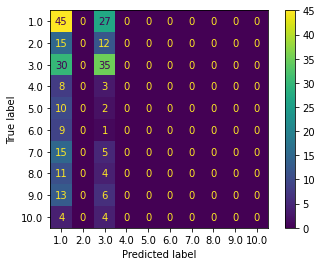

In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

conmat = confusion_matrix(test_y, y_pred)
val = np.mat(conmat) 

classnames = list(set(train["Q16"]))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

plot_confusion_matrix(clf,test_X,test_y)
plt.savefig("cm_svm.png")

## SVM with balancing the data

In [13]:
print(data["Q16"].value_counts())

1.0     724
3.0     702
2.0     246
7.0     217
8.0     174
9.0     139
5.0     134
4.0     117
6.0      76
10.0     70
Name: Q16, dtype: int64


In [14]:
from sklearn import svm

clf_balanced = svm.SVC(decision_function_shape='ovo',class_weight="balanced")
clf_balanced.fit(train_X, train_y)

SVC(class_weight='balanced', decision_function_shape='ovo')

In [15]:
clf_balanced.predict(test_X[:6])

array([5., 3., 4., 9., 5., 1.])

In [16]:
test_y[:6]

3328    1.0
1176    1.0
1331    1.0
1608    2.0
392     8.0
3020    1.0
Name: Q16, dtype: float64

In [17]:
y_pred=clf_balanced.predict(test_X)

In [18]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))

Accuracy: 0.2277992277992278


In [19]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_balanced, train_X, train_y, cv=5)
print(scores)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

[0.21153846 0.18376068 0.18803419 0.19871795 0.17094017]
0.19 accuracy with a standard deviation of 0.01


      1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   10.0
1.0     13     8    10     9    13     5     7     4     3     0
2.0      2     7     6     1     1     2     6     0     2     0
3.0      8     9    19     8     5     3     6     1     4     2
4.0      0     2     2     5     0     0     1     0     0     1
5.0      2     0     0     1     3     1     3     0     2     0
6.0      0     0     1     1     4     1     1     0     1     1
7.0      2     2     3     1     1     1     8     0     1     1
8.0      2     2     2     1     3     1     1     1     2     0
9.0      1     0     4     3     1     1     5     0     2     2
10.0     1     2     2     1     2     0     0     0     0     0


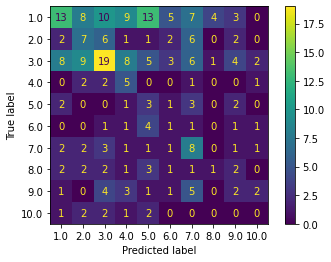

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

conmat = confusion_matrix(test_y, y_pred)
val = np.mat(conmat) 

classnames = list(set(train["Q16"]))

df_cm = pd.DataFrame(val, index=classnames, columns=classnames)

print(df_cm)

plot_confusion_matrix(clf_balanced,test_X,test_y)
plt.savefig("cm_svm_balanced.png")